<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
from uncertainties import ufloat
import glob, os
from scipy import misc
from scipy import stats

In [3]:
datapath = 'radioactive_sources'

# Prelimary Work

## Import all Data Sets into One Data Frame

In [4]:
datafiles = [file for file in os.listdir(datapath)]
list_ = []
for file_ in datafiles:
    df = pd.read_csv(datapath+'/'+file_, skiprows = 12, names=[file_[0:-10]])
    df=df[:-1] #get rid of last row
    df[file_[0:-10]] = df[file_[0:-10]].astype(int) #convert to numeric values
    list_.append(df)
df = pd.concat(list_, axis=1)

## Remove Background Data From Each Column

Since the background was collected for 10 times longer than the isotopes, we divide the column by 10 and then subtract it from the other three columns.

In [5]:
df = df.subtract(df['background'], axis='rows', level=None, fill_value=None)
df.drop(['background'], axis=1, inplace=True)

## Print some Sample Values

In [6]:
df

,co60,cs137,na22
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,157,1894,68


## Initial Plot of Energy Peaks

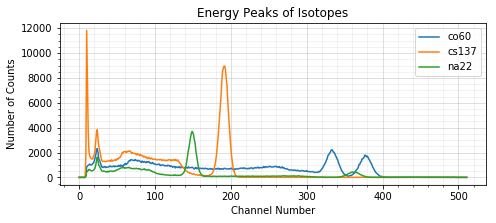

In [7]:
fig, ax = plt.subplots(figsize=(7,3.2))

df.plot(ax=ax)

ax.set_xlabel('Channel Number')
ax.set_ylabel('Number of Counts')
ax.set_title('Energy Peaks of Isotopes')

ax.minorticks_on()
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

fig.tight_layout()
plt.savefig("plots/part2_countpeaks", bbox_inches='tight', dpi=300)
plt.show()

# Fitting the Curves

## Cobalt Peak 1

Use non-linear least squares to fit a function, f, to data.

In [8]:
def norm(x, u, sig, amp):
    return amp*np.exp(-((x-u)**2)/(2*sig**2))

In [9]:
mask = (df.index>320) & (df.index<345)
p0  = (np.mean(df.index[mask]), np.std(df.index[mask]), np.max(df['co60'][mask]))

popt, pcov = curve_fit(norm, df.index[mask], df['co60'][mask], p0=p0)
perr = np.sqrt(np.diag(pcov))

This returns the fit parameters in the array popt, and the <b> standard errors </b> (i.e one standard deviation) in the array pcov.

In [10]:
mean_co60_1 = popt[0]
err_co60_1 = perr[0]

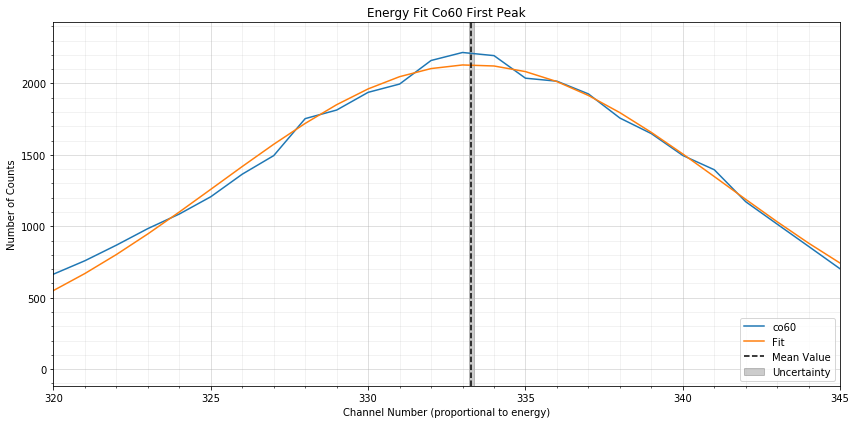

In [11]:
fig, ax = plt.subplots(figsize=(12,6))

df['co60'].plot(ax=ax)
ax.plot(norm(df.index, mean_co60_1, popt[1], popt[2]), label='Fit')

ax.axvline(mean_co60_1, color='k', linestyle='--', label='Mean Value')
ax.axvspan(mean_co60_1-err_co60_1, mean_co60_1+err_co60_1, alpha=0.2, color='k', label='Uncertainty')

ax.set_xlabel('Channel Number (proportional to energy)')
ax.set_ylabel('Number of Counts')
ax.set_title('Energy Fit Co60 First Peak')

ax.set_xlim(320, 345)
ax.minorticks_on()
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.legend(loc='lower right')

fig.tight_layout()
plt.savefig("plots/appendix_part2_co60_1_bestfit", bbox_inches='tight', dpi=300)
plt.show()

## Cobalt Peak 2

In [12]:
limits = [365, 390]

In [13]:
mask = (df.index>limits[0]) & (df.index<limits[1])
p0  = (np.mean(df.index[mask]), np.std(df.index[mask]), np.max(df['co60'][mask]))

popt, pcov = curve_fit(norm, df.index[mask], df['co60'][mask], p0=p0)
perr = np.sqrt(np.diag(pcov))

In [14]:
mean_co60_2 = popt[0]
err_co60_2 = perr[0]

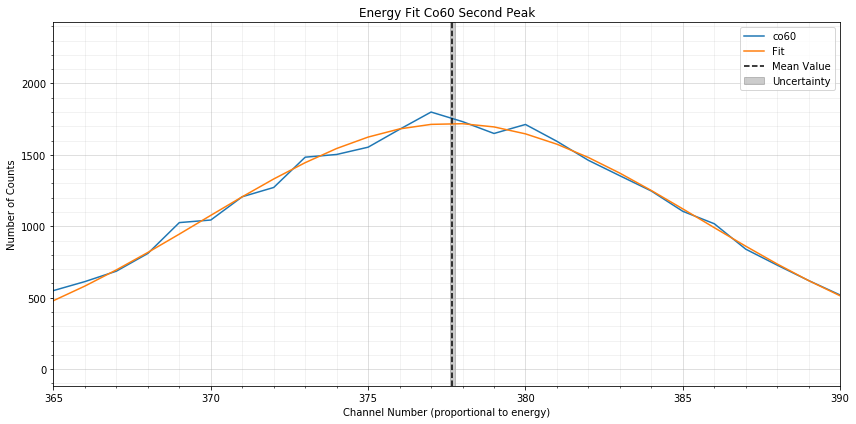

In [15]:
fig, ax = plt.subplots(figsize=(12,6))

df['co60'].plot(ax=ax)
ax.plot(norm(df.index, mean_co60_2, popt[1], popt[2]), label='Fit')

ax.axvline(mean_co60_2, color='k', linestyle='--', label='Mean Value')
ax.axvspan(mean_co60_2-err_co60_2, mean_co60_2+err_co60_2, alpha=0.2, color='k', label='Uncertainty')

ax.set_xlabel('Channel Number (proportional to energy)')
ax.set_ylabel('Number of Counts')
ax.set_title('Energy Fit Co60 Second Peak')

ax.set_xlim(limits[0], limits[1])
ax.minorticks_on()
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.legend()

fig.tight_layout()
plt.savefig("plots/appendix_part2_co60_2_bestfit", bbox_inches='tight', dpi=300)
plt.show()

## Sodium Peak 1

In [16]:
limits = [138, 160]

In [17]:
mask = (df.index>limits[0]) & (df.index<limits[1])
p0  = (np.mean(df.index[mask]), np.std(df.index[mask]), np.max(df['na22'][mask]))

popt, pcov = curve_fit(norm, df.index[mask], df['na22'][mask], p0=p0)
perr = np.sqrt(np.diag(pcov))

In [18]:
mean_na22_1 = popt[0]
err_na22_1 = perr[0]

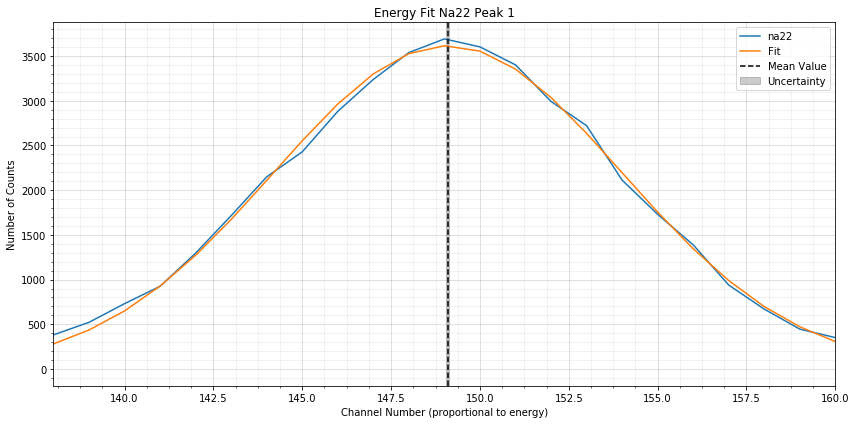

In [19]:
fig, ax = plt.subplots(figsize=(12,6))

df['na22'].plot(ax=ax)
ax.plot(norm(df.index, mean_na22_1, popt[1], popt[2]), label='Fit')

ax.axvline(mean_na22_1, color='k', linestyle='--', label='Mean Value')
ax.axvspan(mean_na22_1-err_na22_1, mean_na22_1+err_na22_1, alpha=0.2, color='k', label='Uncertainty')

ax.set_xlabel('Channel Number (proportional to energy)')
ax.set_ylabel('Number of Counts')
ax.set_title('Energy Fit Na22 Peak 1')

ax.set_xlim(limits[0], limits[1])
ax.minorticks_on()
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.legend()

fig.tight_layout()
plt.savefig("plots/appendix_part2_na22_1_bestfit", bbox_inches='tight', dpi=300)
plt.show()

## Sodium Peak 2

In [20]:
limits = [350, 375]

In [21]:
mask = (df.index>limits[0]) & (df.index<limits[1])
p0  = (np.mean(df.index[mask]), np.std(df.index[mask]), np.max(df['na22'][mask]))

popt, pcov = curve_fit(norm, df.index[mask], df['na22'][mask], p0=p0)
perr = np.sqrt(np.diag(pcov))

In [22]:
mean_na22_2 = popt[0]
err_na22_2 = perr[0]

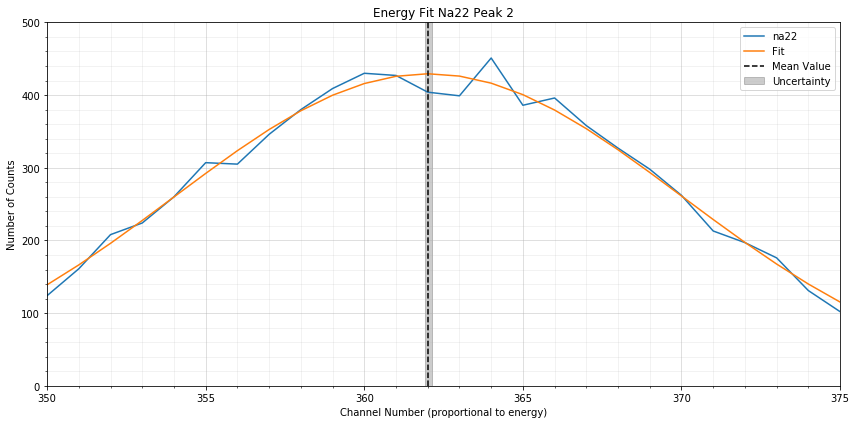

In [23]:
fig, ax = plt.subplots(figsize=(12,6))

df['na22'].plot(ax=ax)
ax.plot(norm(df.index, mean_na22_2, popt[1], popt[2]), label='Fit')

ax.axvline(mean_na22_2, color='k', linestyle='--', label='Mean Value')
ax.axvspan(mean_na22_2-err_na22_2, mean_na22_2+err_na22_2, alpha=0.2, color='k', label='Uncertainty')

ax.set_xlabel('Channel Number (proportional to energy)')
ax.set_ylabel('Number of Counts')
ax.set_title('Energy Fit Na22 Peak 2')

ax.set_xlim(limits[0], limits[1])
ax.minorticks_on()
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.set_ylim(0,500)

ax.legend()

fig.tight_layout()
plt.savefig("plots/appendix_part2_na22_2_bestfit", bbox_inches='tight', dpi=300)
plt.show()

## Cesium Peak

In [24]:
limits = [180, 200]

In [25]:
mask = (df.index>limits[0]) & (df.index<limits[1])
p0  = (np.mean(df.index[mask]), np.std(df.index[mask]), np.max(df['cs137'][mask]))

popt, pcov = curve_fit(norm, df.index[mask], df['cs137'][mask], p0=p0)
perr = np.sqrt(np.diag(pcov))

In [26]:
mean_cs137 = popt[0]
err_cs137 = perr[0]

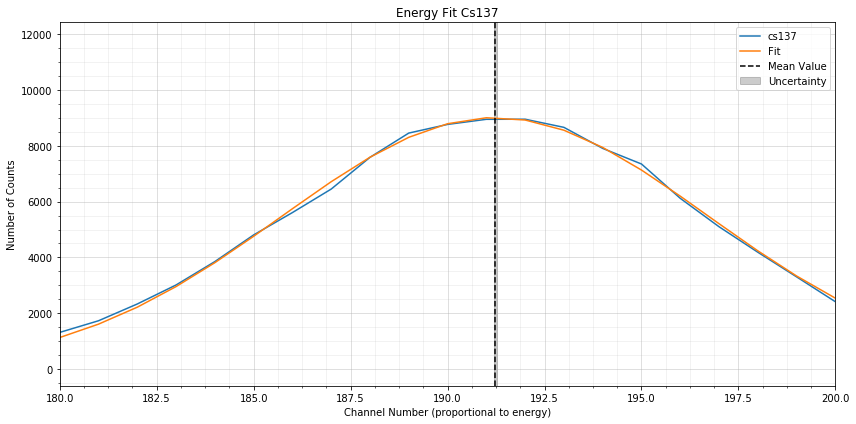

In [27]:
fig, ax = plt.subplots(figsize=(12,6))

df['cs137'].plot(ax=ax)
ax.plot(norm(df.index, mean_cs137, popt[1], popt[2]), label='Fit')

ax.axvline(mean_cs137, color='k', linestyle='--', label='Mean Value')
ax.axvspan(mean_cs137-err_cs137, mean_cs137+err_cs137, alpha=0.2, color='k', label='Uncertainty')

ax.set_xlabel('Channel Number (proportional to energy)')
ax.set_ylabel('Number of Counts')
ax.set_title('Energy Fit Cs137')

ax.set_xlim(limits[0], limits[1])
ax.minorticks_on()
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.legend()

fig.tight_layout()
plt.savefig("plots/appendix_part2_cs137_1_bestfit", bbox_inches='tight', dpi=300)
plt.show()

# Analysis

## Define the Energy Peaks

In [28]:
co_peak_1 = 1173.228
co_peak_2 = 1332.494
cs_peak = 661.657
na_peak_1 = 511.006
na_peak_2 = 1274.537

energies = np.array([na_peak_1, na_peak_2, cs_peak, co_peak_1, co_peak_2])

## Define the Channel Peaks

In [29]:
channel_mean_na22_1 = ufloat(mean_na22_1, err_na22_1)
channel_mean_na22_2 = ufloat(mean_na22_2, err_na22_2)
channel_mean_cs137 = ufloat(mean_cs137, err_cs137)
channel_mean_co60_1 = ufloat(mean_co60_1, err_co60_1)
channel_mean_co60_2 = ufloat(mean_co60_2, err_co60_2)

channels_unc = np.array([channel_mean_na22_1, channel_mean_na22_2, channel_mean_cs137,
                         channel_mean_co60_1, channel_mean_co60_2])

channels = np.array([x.nominal_value for x  in channels_unc]) #no uncertainties when plotting
channels_err = np.array([x.std_dev for x  in channels_unc]) #no uncertainties when plotting

## Inital Plot

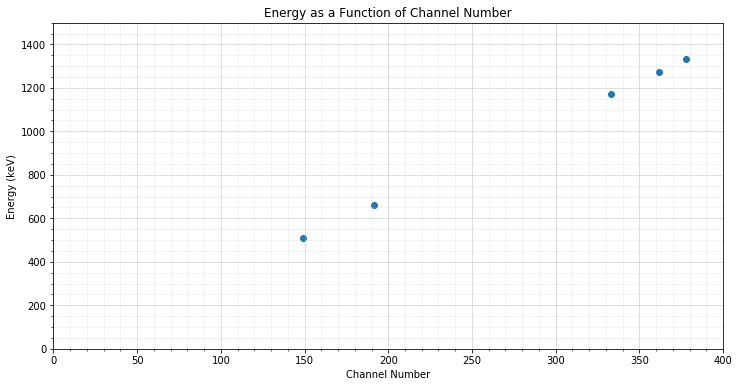

In [30]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(channels, energies)

ax.set_xlabel('Channel Number')
ax.set_ylabel('Energy (keV)')
ax.set_title('Energy as a Function of Channel Number')

ax.minorticks_on()
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.set_xlim(0,400)
ax.set_ylim(0,1500)


plt.show()

We can use least squares fit on any **four** of these points and then predict what the value of the fifth point should be.

In [31]:
def line(x, a, b):
    return a+b*x

[a, b], pcov = curve_fit(line, channels, energies)
[a_err, b_err] = np.sqrt(np.diag(pcov))

In [32]:
x = np.arange(0, 400, 1)

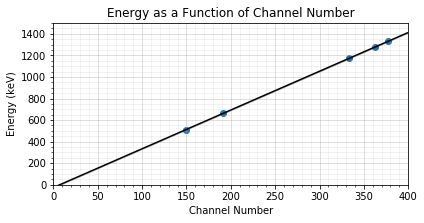

In [33]:
fig, ax = plt.subplots(figsize=(6,3.2))

ax.scatter(channels, energies)
ax.plot(x, line(x, a, b), color='k')
ax.fill_between(x, line(x, a-a_err, b-b_err), line(x, a+a_err, b+b_err), alpha=0.2, color='k')

ax.set_xlabel('Channel Number')
ax.set_ylabel('Energy (keV)')
ax.set_title('Energy as a Function of Channel Number')

ax.minorticks_on()
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.set_xlim(0,400)
ax.set_ylim(0,1500)

fig.tight_layout()
plt.savefig("plots/part2_linbestfit", bbox_inches='tight', dpi=600)
plt.show()

Guess's the energy of the $\text{i}^{th}$ value in the array channels by fitting the other 4 points to a line and using that line to make a guess.

In [34]:
def energy_guess(i):
    points_to_use = np.delete(channels, i)
    
    [a_val, b_val], pcov = curve_fit(line, channels, energies)
    [a_err, b_err] = np.sqrt(np.diag(pcov))
    
    a = ufloat(a_val, a_err)
    b = ufloat(b_val, b_err)
    
    return a+channels_unc[i]*b

## The Calculations

### Sodium Peak 1

In [35]:
energy_guess(0)

510.72093556096104+/-1.473112367419453

### Sodium Peak 2

In [36]:
energy_guess(1)

1275.7122048553724+/-2.104178597164312

### Cesium Peak

In [37]:
energy_guess(2)

662.0930699684305+/-1.5621382072745549

### Cobalt Peak 1

In [38]:
energy_guess(3)

1172.4500072016667+/-1.9881302661344673

### Cobalt Peak 2

In [39]:
energy_guess(4)

1331.9457824597375+/-2.1359173081165284